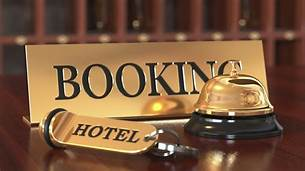




## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing required packages
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
hb=pd.read_csv('/content/drive/MyDrive/Capstone Project /Project 1/Hotel Bookings.csv')


In [6]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
hb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# Creating a copy of dataframe

hb1= hb.copy()


First of all we will try to understand the meaning of all columns of the dataframe. 

 For this we will see the unique values attained by each column whose meaning we are unable to understand.



In [10]:
hb1['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
hb1['is_canceled'].unique()


array([0, 1])

In [12]:
hb1['arrival_date_year'].unique()


array([2015, 2016, 2017])

In [13]:
hb1['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
hb1['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [15]:
hb1['distribution_channel'].unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [16]:
hb1['children'].unique()    # This column has 0 as well as null values


array([ 0.,  1.,  2., 10.,  3., nan])

Cleaning data
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
 
 1) Remove duplicate rows
 
 2) Handling missing values.
 
 3) Convert columns to appropriate datatypes.
 
  4) Adding important columns



Step 1: Removing duplicate rows if any


In [17]:
hb1[hb1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows


(31994, 32)

We have found 31994 duplicate value
then we drop the duplicate values

In [18]:
# Dropping duplicate values
hb1.drop_duplicates(inplace = True)

In [19]:
hb1.shape

(87396, 32)

Step2: Handling missing values.


In [20]:
# Columns having missing values.
hb1.isnull().sum().sort_values(ascending = False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

In [21]:
hb1.isnull().sum()/len(hb.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.378591
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Since,  we have to remove those  column which is having  more the 15% null values.After finding those null values we will drop that column




In [22]:
 # We delete and company columns
hb1=hb1.drop(['company'],axis=1)

Now we will drop the days_in_waiting_list column because we won’t use it for this analysis

In [23]:
# We delete days_in_waiting_list column
hb1 = hb1.drop(labels='days_in_waiting_list', axis=1) 

agent have less then 15% missing value then we fill mission value by 0


In [24]:
hb1[['agent']] = hb1[['agent']].fillna(0)

In [25]:
hb1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.

 So, 'nan' values are the missing values due to error of recording data.
 
 We will replace the null values under this column with mean value of children.



In [26]:
hb1['children'].fillna(hb1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of origin of customer.

Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [27]:
hb1['country'].fillna('others', inplace = True)


Now we  will check Null value is present or Not.

In [28]:
# Checking if all null values are removed
hb1.isnull().sum().sort_values(ascending = False)[:20]

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.



In [29]:
hb1[hb1['adults']+hb1['babies']+hb1['children'] == 0].shape

(166, 30)

In [30]:
hb1.drop(hb1[hb1['adults']+hb1['babies']+hb1['children'] == 0].index, inplace = True)

Step: Adding some columns.
    
Convert columns to appropriate datatypes.


In [31]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hb1[['children', 'agent']] = hb1[['children', 'agent']].astype('int64')

In [32]:
# changing datatype of column 'reservation_status_date' to data_type.
hb1['reservation_status_date'] = pd.to_datetime(hb1['reservation_status_date'], format = '%Y-%m-%d')

In [33]:
#All kids
hb1['kids'] = hb1.children + hb1.babies

#Combine total mumbers by adding kids and adults
hb1['total_members'] = hb1.kids + hb1.adults

# EDA Data Analysis

# a) Confirmed Bookings


## How many confirmed bookings are there in a month ?

In [34]:
hb.arrival_date_month.value_counts().sort_values(ascending = False)[:12]

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


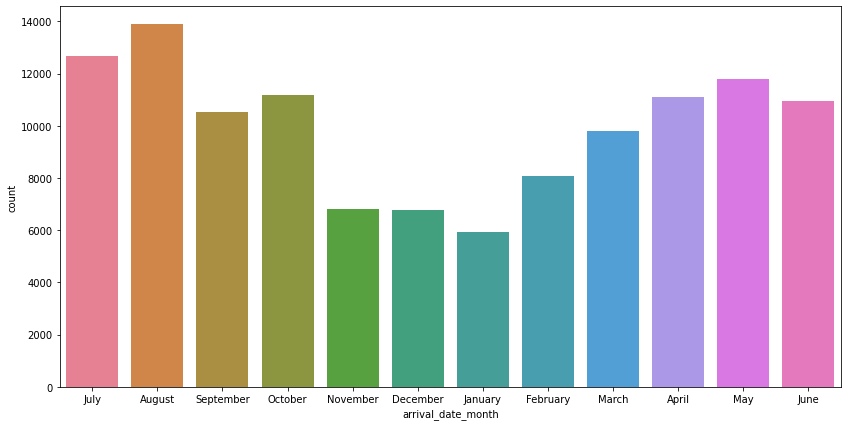

In [35]:
plt.figure(figsize=(14,7))
sns.countplot(hb['arrival_date_month'], palette='husl')
plt.show()

August  Month 13877 is high confirmed booking hotel.
July is 2nd hight 12661 booking confirmed

Which most 

In [36]:
#Which are the most busy months?
d_month = hb1['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hb1[(hb1['hotel'] == 'Resort Hotel') & (hb1['is_canceled'] == 0)]
data_city = hb1[(hb1['hotel'] == 'City Hotel') & (hb1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel


,month,price_for_resort,price_for_city_hotel
0,April,76.841664,114.251636
1,August,182.103524,122.825388
2,December,64.072826,90.769559
3,February,53.624311,88.210810
4,January,48.599615,83.378062
5,July,150.914540,120.069489
6,June,109.026942,120.673753
7,March,57.110018,91.306933
8,May,77.725129,124.825944
9,November,48.956548,88.271089


Most revenue   Hotel in  month

*   'Resort Hotel' Augest 182.103524
*   'City Hotel'  August 122.825388



# Which is the month get most visitors?

In [37]:
resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()


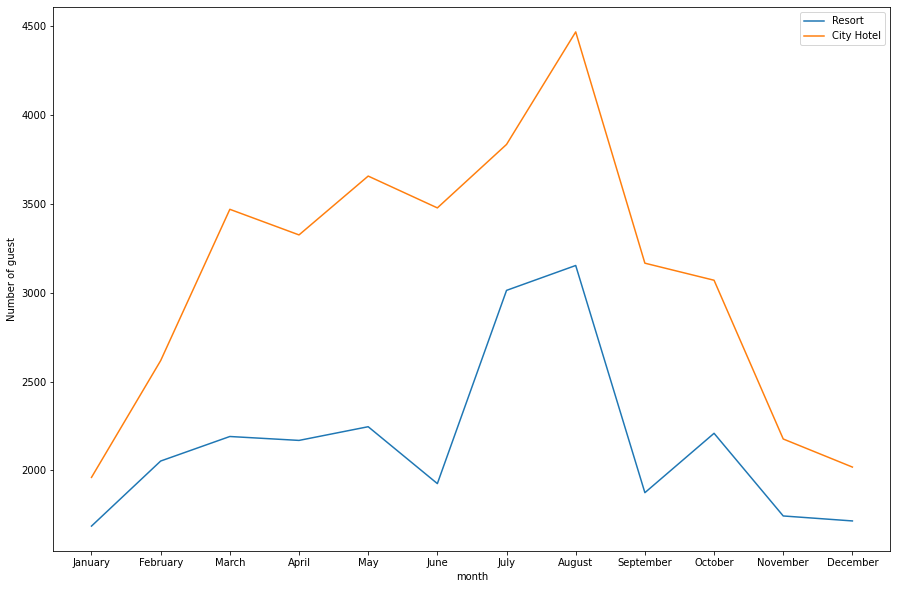

In [38]:
#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Which Distribution Channel is mostly prefered?

In [88]:
hb1.groupby(["hotel"])["distribution_channel"].agg(["value_counts"])

value_counts
hotel        distribution_channel              
City Hotel   TA/TO                        44442
             Direct                        6056
             Corporate                     2591
             GDS                            181
             Undefined                        4
Resort Hotel TA/TO                        24586
             Direct                        6898
             Corporate                     2471
             Undefined                        1

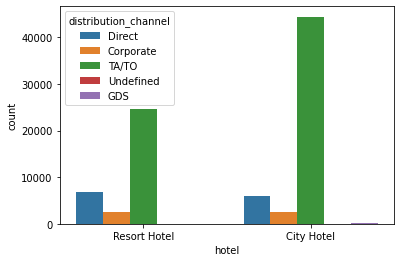

In [90]:
sns.countplot(x = "hotel", hue = "distribution_channel", data = hb1);

Which  Market segment designation most Booking .

1.   “TA” means “Travel Agents
2.   “TO” means “Tour 

In [39]:
hb1.market_segment.value_counts(normalize=True)

Online TA        0.591001
Offline TA/TO    0.158833
Direct           0.135045
Groups           0.056426
Corporate        0.048149
Complementary    0.007933
Aviation         0.002591
Undefined        0.000023
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


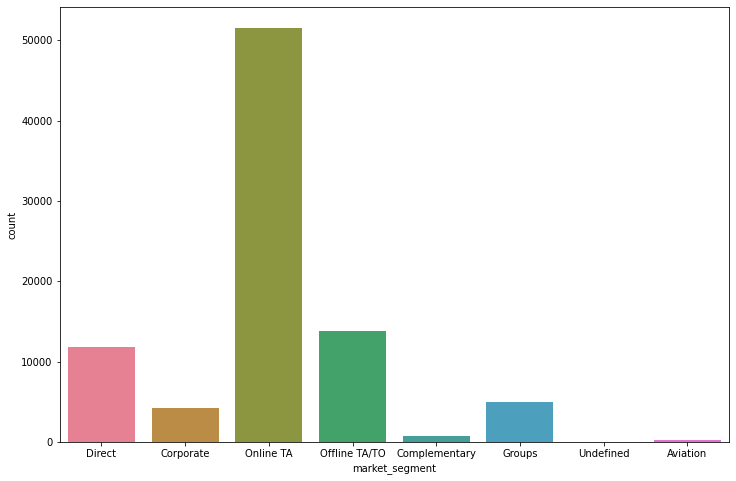

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(hb1['market_segment'], palette='husl')
plt.show()

Around 59% of bookings are made via Online Travel Agents, almost 16% of bookings are made via Offline Travel Agents and less than 15% are Direct bookings without any other agents.

What is the maximum lead time in each hotels?

In [91]:
hb1.groupby(["hotel"])["lead_time"].agg(["max"])

,max
hotel,
City Hotel,629
Resort Hotel,737


 Which Numbers of guests who did not booked hotels in advance?

In [92]:
hb1["lead_time"][hb1["lead_time"] == 0].agg(["value_counts"])

,value_counts
0,5906


5906 guests are not book in advance

Which is the most busy year?

In [41]:
hb1.arrival_date_year.value_counts(normalize=True)

2016    0.485074
2017    0.362639
2015    0.152287
Name: arrival_date_year, dtype: float64

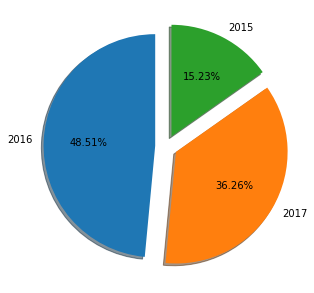

In [42]:
year = [2016, 2017, 2015]
counts = hb1.arrival_date_year.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(counts, explode = (0.1, 0.1, 0.1), labels = year, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.show();

Which are the most busiest month?

In [96]:
hb1.groupby(["hotel"])["arrival_date_month"].agg(["value_counts"])

value_counts
hotel        arrival_date_month              
City Hotel   August                      6576
             July                        5730
             May                         5402
             April                       5072
             June                        4997
             March                       4833
             September                   4232
             October                     4197
             February                    3591
             December                    2998
             November                    2922
             January                     2724
Resort Hotel August                      4666
             July                        4313
             May                         2942
             April                       2828
             June                        2759
             October                     2724
             March                       2656
             February                    2492
             September                   2450
             December                    2114
             November                    2051
             January                     1961

 peak season month City : 2015 - oct (means higest booking done in oct ) 2016 - sept 2017 - may resort : 2015 - oct 2016 - oct 2017 - may

How many guests arrived date-wise?

In [97]:
hb1.groupby(["hotel", "arrival_date_day_of_month"])["arrival_date_day_of_month"].agg(["count"])

count
hotel        arrival_date_day_of_month       
City Hotel   1                           1595
             2                           1871
             3                           1756
             4                           1696
             5                           1828
...                                       ...
Resort Hotel 27                          1080
             28                          1142
             29                          1102
             30                          1213
             31                           751

[62 rows x 1 columns]

In [43]:
hb1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,Transient,98.0,0,1,Check-Out,2015-07-03,0,2


Online TA segment are by booking 

#Cancelled bookings
Now lets check the cancelled bookings


 # How many canceled are there  after booking?

In [44]:
print('Total Bookings cancelled')
print(hb1.is_canceled.value_counts())
print('Cancelation percentage')
print(hb1.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    63221
1    24009
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.724762
1    0.275238
Name: is_canceled, dtype: float64


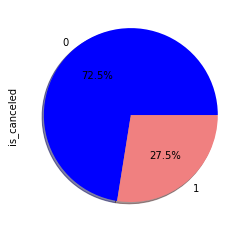

In [80]:
cols = ['Blue', 'lightcoral']
hb1['is_canceled'].value_counts().plot.pie(autopct='%.1f%%',shadow=True, colors=cols)



According to the pie chart, 72.5% of bookings were not cancelled and 27.5% of the bookings were cancelled at the Hotel.

# Guest arrival trend week wise is as follows

In [98]:
hb1[hb1["is_canceled"]== "No"]
hb1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,Transient,98.00,0,1,Check-Out,2015-07-03,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,Transient,96.14,0,0,Check-Out,2017-09-06,0,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,Transient,225.43,0,2,Check-Out,2017-09-07,0,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,Transient,157.71,0,4,Check-Out,2017-09-07,0,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,Transient,104.40,0,0,Check-Out,2017-09-07,0,2


In [99]:
week1=len(hb1[(hb1["arrival_date_day_of_month"]>=1) & (hb1["arrival_date_day_of_month"]<=7)])

week2=len(hb1[(hb1["arrival_date_day_of_month"]>=8) & (hb1["arrival_date_day_of_month"]<=14)])

week3=len(hb1[(hb1["arrival_date_day_of_month"]>=15) & (hb1["arrival_date_day_of_month"]<=21)])

week4=len(hb1[(hb1["arrival_date_day_of_month"]>=22) & (hb1["arrival_date_day_of_month"]<=31)])

l=[]
l.append(week1)
l.append(week2)
l.append(week3)
l.append(week4)
s=sorted(l)
print(s)

[19786, 19869, 20419, 27156]


 maximum people visted the hotel in week4 (last week) of month so business heads can plan business strategies for last happy week of months

In [101]:
hb1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,Transient,98.0,0,1,Check-Out,2015-07-03,0,2


Which countries are  having most visitors?

In [46]:
hb1.country.value_counts(normalize=True)

PRT    0.313596
GBR    0.119500
FRA    0.101146
ESP    0.083045
DEU    0.061733
         ...   
MMR    0.000011
BFA    0.000011
CYM    0.000011
MLI    0.000011
KHM    0.000011
Name: country, Length: 178, dtype: float64

 Which is  the Meal
Type of meal most  booked. Categories are presented in standard hospitality meal packages:

Undefined/SC — no meal package;
BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)

In [47]:
hb1.meal.value_counts(normalize=True)

BB           0.778482
SC           0.107658
HB           0.104093
Undefined    0.005640
FB           0.004127
Name: meal, dtype: float64

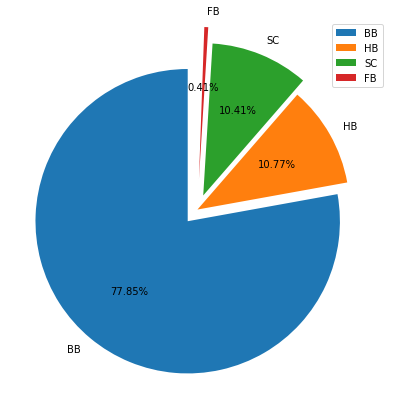

In [93]:
meal = ["BB", "HB", "SC", "FB"]
values = [0.778482,0.107658,0.104093, 0.004127]

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();





  77.8%  people prefer (BB — Bed & Breakfast)  meal

What are the Babies favorite and least favorite meals?

In [94]:
hb1.iloc[np.where((hb1["babies"] > 0) & (hb1["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,661
HB,177
SC,37
FB,24


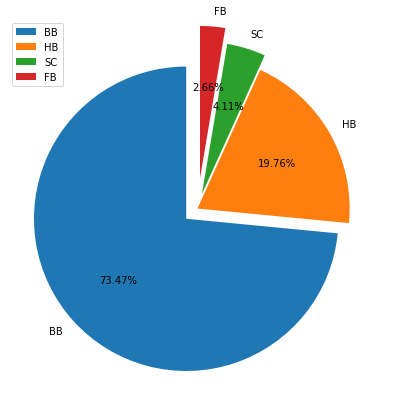

In [95]:
meal = ["BB", "HB", "SC", "FB"]
values = [662, 178, 37, 24]

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();


Which customer type are having  most  booking ?

In [49]:
hb1.customer_type.value_counts(normalize=True)

Transient          0.823822
Transient-Party    0.134036
Contract           0.035939
Group              0.006202
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


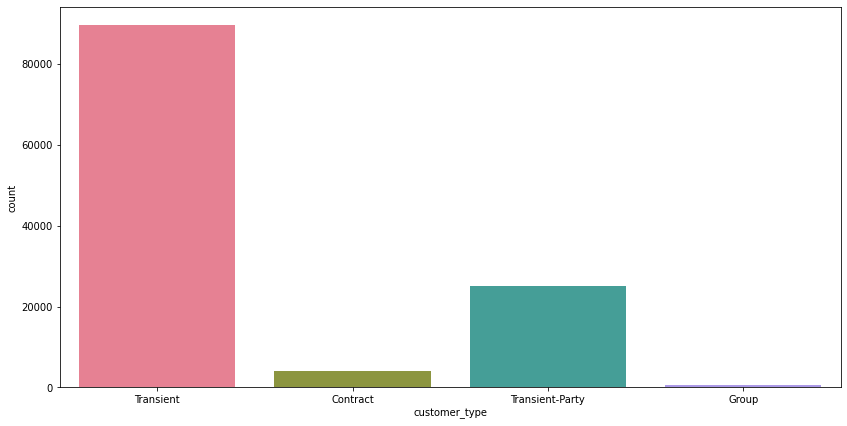

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(hb['customer_type'], palette='husl')
plt.show()

Transisent customer type most booking

which customer  most booking change ?

In [51]:
hb1.booking_changes.value_counts(normalize=True)

0     0.818812
1     0.124590
2     0.039929
3     0.009882
4     0.003978
5     0.001295
6     0.000653
7     0.000332
8     0.000160
9     0.000092
10    0.000069
13    0.000057
14    0.000034
15    0.000034
17    0.000023
16    0.000023
12    0.000011
18    0.000011
11    0.000011
Name: booking_changes, dtype: float64

0 number of customert 81% are most booking change

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


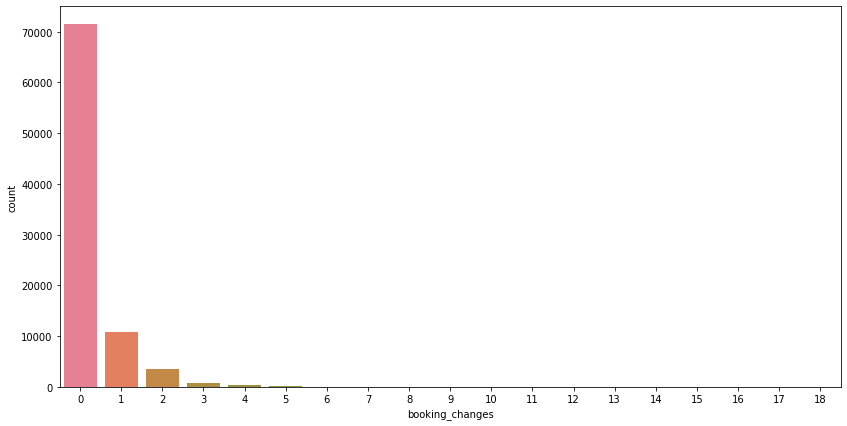

In [52]:
plt.figure(figsize=(14,7))
sns.countplot(hb1['booking_changes'], palette='husl')
plt.show()

How may repeated guest are coming?

In [53]:
hb1.is_repeated_guest.value_counts(normalize=True)


0    0.961435
1    0.038565
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


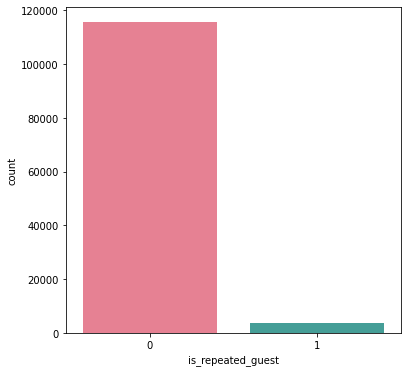

In [54]:
plt.figure(figsize=(6,6))
sns.countplot(hb['is_repeated_guest'], palette='husl')
plt.show()

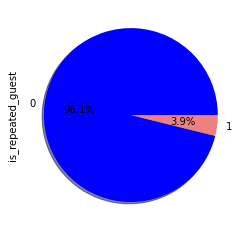

In [55]:
hb1['is_repeated_guest'].value_counts().plot.pie(autopct='%.1f%%',shadow=True, colors=cols)

almost 4% of guest are coming repeatedly 

Deposit Type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit — no deposit was made;
Non Refund — a deposit was made in the value of the total stay cost;
Refundable — a deposit was made with a value under the total cost of stay.

In [56]:
hb1.deposit_type.value_counts(normalize=True)

No Deposit    0.986874
Non Refund    0.011900
Refundable    0.001227
Name: deposit_type, dtype: float64

 Almost 99% of Customer are having  major booking without deposit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


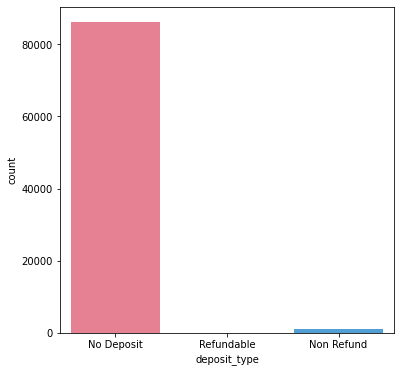

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(hb1['deposit_type'], palette='husl')
plt.show()

How many guests arrived year-wise?

In [81]:
hb1.groupby(["hotel"])["arrival_date_year"].agg(["value_counts"])

value_counts
hotel        arrival_date_year              
City Hotel   2016                      26684
             2017                      20064
             2015                       6526
Resort Hotel 2016                      15629
             2017                      11569
             2015                       6758

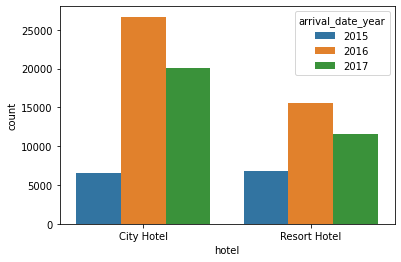

In [84]:
sns.countplot(x = "hotel", hue = "arrival_date_year", data = hb1, order = ["City Hotel", "Resort Hotel"]);


How  many number of car parking spaces required by the customer?

In [58]:
hb1.required_car_parking_spaces.value_counts(normalize=True)

0    0.916244
1    0.083377
2    0.000321
3    0.000034
8    0.000023
Name: required_car_parking_spaces, dtype: float64

91% customer not required car parking

How many family member per reservation ?



In [59]:
hb1.total_members.value_counts(normalize=True)

2     0.654098
1     0.184249
3     0.115534
4     0.044365
5     0.001559
26    0.000057
12    0.000023
27    0.000023
20    0.000023
10    0.000023
40    0.000011
50    0.000011
55    0.000011
6     0.000011
Name: total_members, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


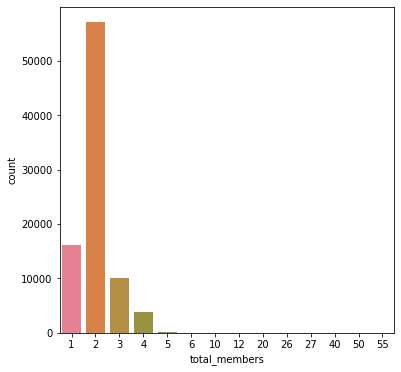

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(hb1['total_members'], palette='husl')
plt.show()

 65% of 2 people in family  are having most reservation.

How many customer have booked and then cancelled?

Cancelled — booking was cancelled by the customer;
Check-Out — customer has checked in but already departed;
No-Show — customer did not check-in and did inform the hotel of the reason why

In [61]:
hb1.reservation_status.value_counts(normalize=True)

Check-Out    0.724762
Canceled     0.263625
No-Show      0.011613
Name: reservation_status, dtype: float64

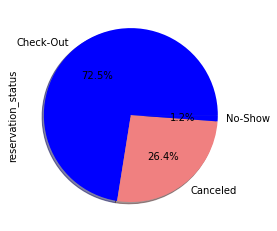

In [87]:
hb1['reservation_status'].value_counts().plot.pie(autopct='%.1f%%',shadow=True, colors=cols)

26 % of after booking canceled

Which  months  are having most expensive hotels?

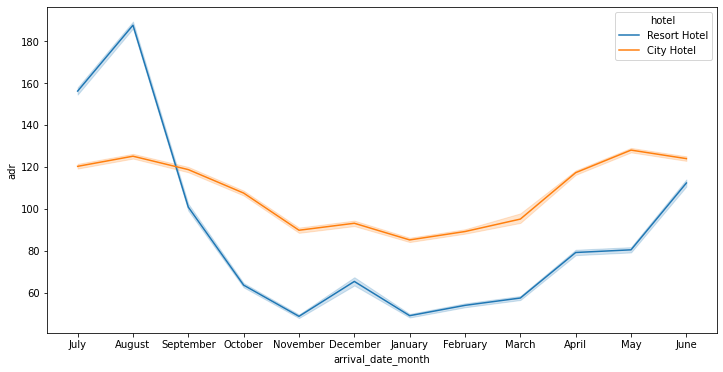

In [63]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hb1)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

Which hotel type  are having most reservation?

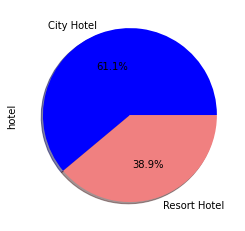

In [64]:
hb1['hotel'].value_counts().plot.pie(autopct='%.1f%%',shadow=True, colors=cols)

City hotel most prefer customer

Which type of hotels are preferred by adults.

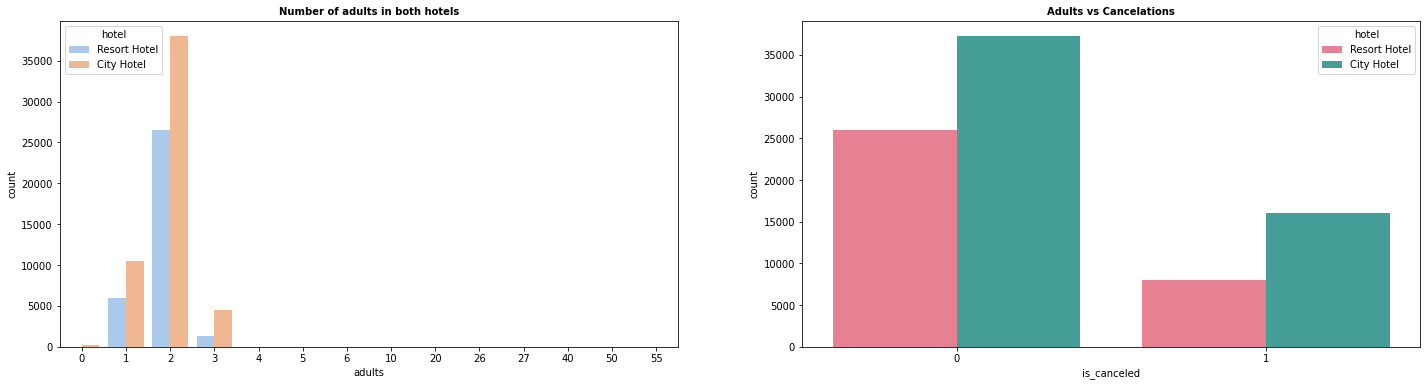

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=hb1, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=10)
plt.subplot(1, 2, 2)
sns.countplot(data =hb1, x = 'is_canceled', hue='hotel', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=10)
plt.subplots_adjust(right=1.7)


plt.show()

adult most prefer city hotel, adult calceled are less.

Which type of hotels are having  most booking in a weekend nights and  then cancelled?

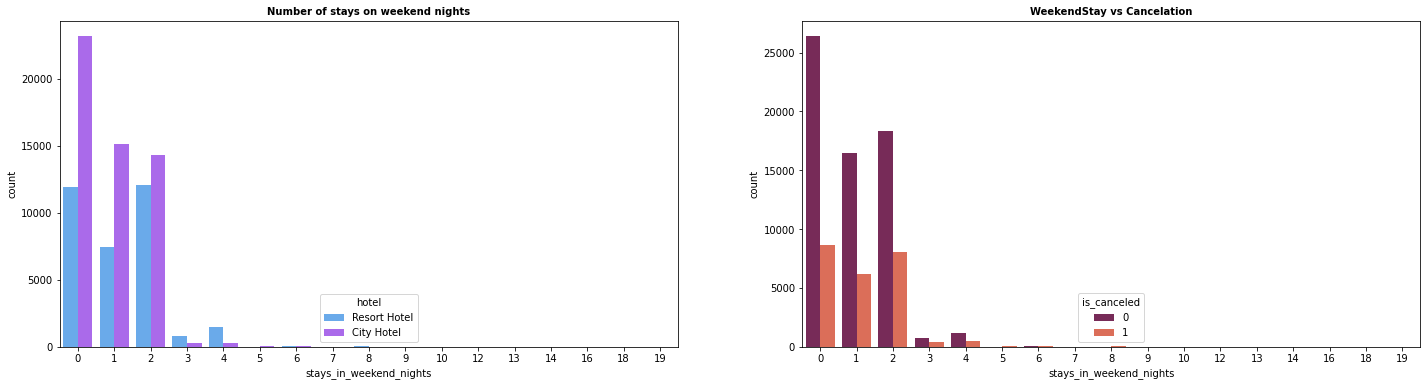

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=hb1, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=10)
plt.subplot(1, 2, 2)
sns.countplot(data = hb1, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=10)
plt.subplots_adjust(right=1.7)

plt.show()

In the first graph we can see that most of the weekend nights were booked in City Hotel

 Second plot shows most of weekend nights which were booked were not cancelled

Which type of hotels are having most booking in a  weekdays night and then calceled?

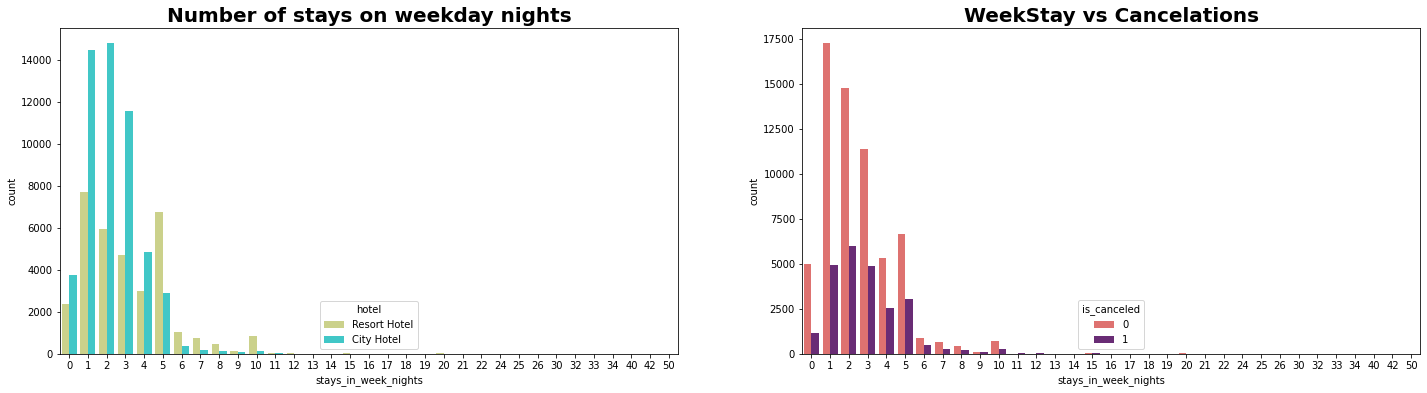

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x= 'stays_in_week_nights',hue='hotel', data=hb1, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hb1, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

1)Weekday night stays were more in City Hotel

2) Less cancelations were observed

How many kids are preferred in hotel?

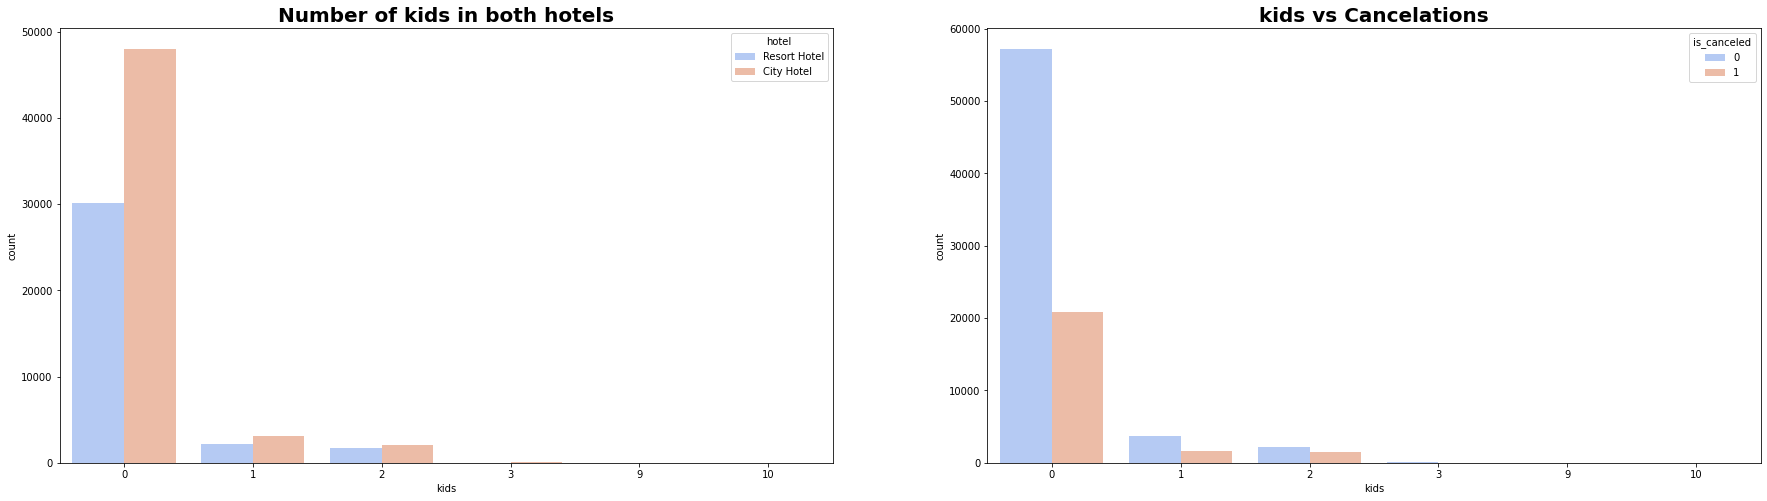

In [68]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='kids',hue='hotel', data=hb1, palette='coolwarm')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data =hb1, x = 'kids', hue='is_canceled', palette='coolwarm')
plt.title('kids vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

1) Most visitors were arrived in pair with no kids and preferred 

2) City hotel over resort hotel

3) visitors who had 1 or 2 children also preferred city hotel

In which countries most visitors are coming ?




In [69]:
hb1.country.value_counts(normalize=True)

PRT    0.313596
GBR    0.119500
FRA    0.101146
ESP    0.083045
DEU    0.061733
         ...   
MMR    0.000011
BFA    0.000011
CYM    0.000011
MLI    0.000011
KHM    0.000011
Name: country, Length: 178, dtype: float64

More visitors are from  France(FRA),Great Britain(GBR) and Portugal(PTR) being the highest.

In [70]:
hb1.booking_changes.sum()

23421

There were 23,421 registered changes in the bookings during this period.

How many people have been registered in the hotel?

In [71]:
hb1.total_members.sum()

176999

176990.0 people have been registered in the hotel.



How many car parking spaces have been used?

In [72]:
hb1.required_car_parking_spaces.sum()

7354

7354 car_parking_space are avalible

# Conclusion
1) Majority of the guests are from Western Europe. We should spend a 
significant amount of our budget on those area.Encourage Direct bookings by offering special discounts

2) Majority of the hotels  are booked by city hotels. Definitely need to spend the most targeting fund on those hotel.

3)The number of repeated guests are too low. we should target our 
 advertisement on guests to increase returning guests.

4) The majority of reservations converts into successful transactions.

5)We  have also realise that the high rate of cancellations can be due to high no deposit policies.

6) We should also target months between May to Aug. Those are peak months 
due to the summer period.

#Strategies to Counter High Cancellations at the Hotel

Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.

Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.

# References
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Analytics Vidya :-  https://www.analyticsvidhya.com/blog/2022/04/exploratory-data-analysis-eda-in-python/

